# Лабораторная работа №2
## Студент: Постнов Л. А.
## Группа: М8О-306Б-22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Подгружаем датасет

In [2]:
df = pd.read_csv('./train.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Следующая функция строит графиики распределения определенного признака из определенного датасета

In [3]:
def distribution_plot(df, feature):
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение признака {feature}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    plt.show()

Начинаем обработку данных, а именно работу с пропущенными значениями:
* Удаляем полностью пустые строки
* Заполняем пропуски в категориальных признаках модой
* Используем KNN для заполнения пропусков в числовых признаках

Между делом проверяем, что все пропуски действительно ушли

In [ ]:
df = df.dropna(how='all').copy()
df.isnull().sum()

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   501
LoanAmount                    501
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           501
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             501
LoanPurpose                   501
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        501
TotalAssets                   501
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

In [5]:
df.select_dtypes(include=['object']).isnull().sum()

ApplicationDate          0
MaritalStatus            0
HomeOwnershipStatus      0
LoanPurpose            501
EmploymentStatus         0
EducationLevel           0
dtype: int64

In [ ]:
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df.select_dtypes(include=['object'])

,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
0,2010-06-26,Divorced,Rent,Education,Employed,Associate
1,1996-09-23,Widowed,Mortgage,Home,Employed,High School
2,2015-01-19,Married,Mortgage,Education,Employed,Bachelor
3,1981-05-12,Married,Other,Debt Consolidation,Employed,High School
4,1995-05-07,Single,Rent,Debt Consolidation,Employed,Bachelor
...,...,...,...,...,...,...
11011,1980-01-15,Divorced,Own,Home,Employed,Associate
11012,2010-07-10,Married,Own,Education,Employed,Associate
11013,2003-10-22,Single,Own,Home,Employed,Bachelor
11014,1983-05-12,Married,Rent,Education,Self-Employed,Associate


In [7]:
df.select_dtypes(include=['object']).isnull().sum()

ApplicationDate        0
MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

In [8]:
from sklearn.impute import KNNImputer

columns_with_missing_data = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer(n_neighbors=5)
df[columns_with_missing_data] = imputer.fit_transform(df[columns_with_missing_data])

In [9]:
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

Удаляем столбец с датой за ненадобностью

In [10]:
df.drop('ApplicationDate', axis=1, inplace=True)

Исследуем целевую переменную и удаляем выбросы

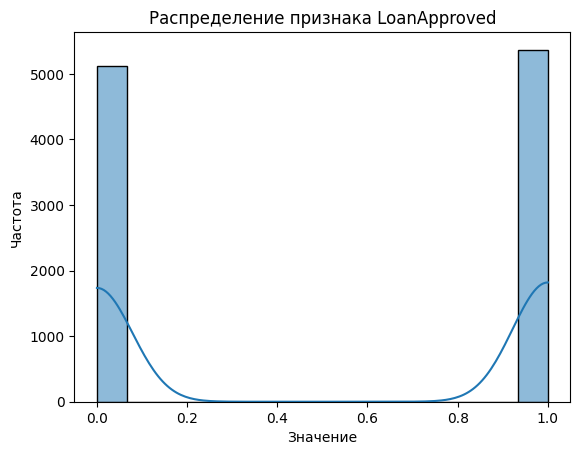

In [11]:
round(df['LoanApproved'].describe(), 2)
distribution_plot(df, "LoanApproved")

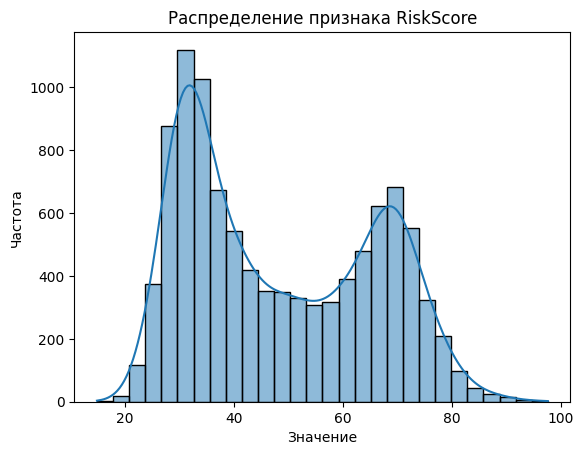

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,27.0,66829.0,549.000000,17290.000000,60.0,Divorced,1.0,Rent,1095.000000,0.151985,...,Employed,Associate,4.0,35067.00000,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,55.0,172147.0,850.000000,16110.000000,36.0,Widowed,1.0,Mortgage,211.000000,0.175693,...,Employed,High School,33.0,27001.00000,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,51.0,300000.0,850.000000,38436.000000,36.0,Married,0.0,Mortgage,546.000000,0.444605,...,Employed,Bachelor,28.0,278382.00000,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,25.0,34683.0,847.000000,19186.000000,48.0,Married,0.0,Other,153.000000,0.188452,...,Employed,High School,0.0,9224.00000,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,55.0,300000.0,850.000000,30437.000000,48.0,Single,2.0,Rent,562.000000,0.273431,...,Employed,Bachelor,31.0,4502.00000,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,39.0,300000.0,850.000000,7721.000000,72.0,Divorced,5.0,Own,276.000000,0.215136,...,Employed,Associate,16.0,18607.00000,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,57.0,300000.0,850.000000,14756.000000,48.0,Married,2.0,Own,620.000000,0.477742,...,Employed,Associate,38.0,167544.00000,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,28.0,15000.0,300.000000,51361.000000,96.0,Single,1.0,Own,696.000000,0.322554,...,Employed,Bachelor,5.0,116879.00000,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,23.0,15000.0,302.000000,30724.000000,72.0,Married,3.0,Rent,413.000000,0.497062,...,Self-Employed,Associate,0.0,250778.00000,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707


In [12]:
def remove_outliers_iqr(df, column):
    # Вычисляем Q1 (25-й процентиль) и Q3 (75-й процентиль)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Интерквартильный размах (IQR)
    IQR = Q3 - Q1
    
    # Определяем границы для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Фильтруем данные, убирая выбросы
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# Применяем к нужному столбцу, например 'RiskScore'
df = remove_outliers_iqr(df, 'RiskScore')
distribution_plot(df, 'RiskScore')
df


Исследуем два не очень понятных мне признака

[0.        1.        0.0525736]


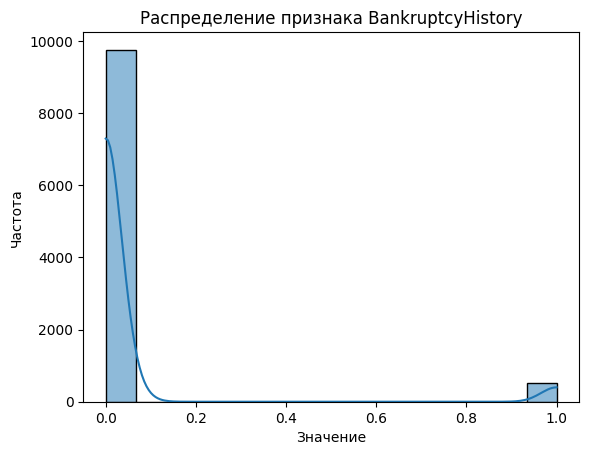

In [13]:
print(df['BankruptcyHistory'].unique())
distribution_plot(df, 'BankruptcyHistory')

Замечаем, что, вообще говоря, признак должен быть логическим (1 и 0), но помимо этого присутствует какое-то залетное значение, его мы депортируем из датасета

In [14]:
print(df[(df['BankruptcyHistory'] != 1) & (df['BankruptcyHistory'] != 0)].count())
df = df[(df['BankruptcyHistory'] == 1) | (df['BankruptcyHistory'] == 0)]

Age                           485
AnnualIncome                  485
CreditScore                   485
LoanAmount                    485
LoanDuration                  485
MaritalStatus                 485
NumberOfDependents            485
HomeOwnershipStatus           485
MonthlyDebtPayments           485
CreditCardUtilizationRate     485
NumberOfOpenCreditLines       485
NumberOfCreditInquiries       485
DebtToIncomeRatio             485
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults          485
PaymentHistory                485
LengthOfCreditHistory         485
SavingsAccountBalance         485
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities              485
MonthlyIncome                 485
UtilityBillsPaymentHistory    485
JobTenure                     485
EmploymentStatus              485
EducationLevel                485
Experience                    485
NetWorth                      485
BaseInterestRa

[0. 1.]


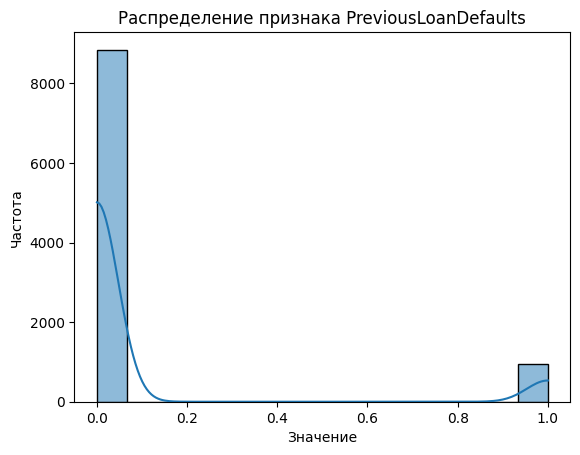

In [15]:
print(df['PreviousLoanDefaults'].unique())
distribution_plot(df, 'PreviousLoanDefaults')

Отделяем целевую переменную в отдельный датафрейм, для дальнейшего использованя в обучении моделей

In [16]:
Y = df["LoanApproved"].copy()
df.drop('LoanApproved', axis=1, inplace=True)
Y

/tmp/ipykernel_150474/2198489601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('LoanApproved', axis=1, inplace=True)


0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11010    1.0
11011    1.0
11012    1.0
11013    0.0
11014    0.0
Name: LoanApproved, Length: 9787, dtype: float64

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


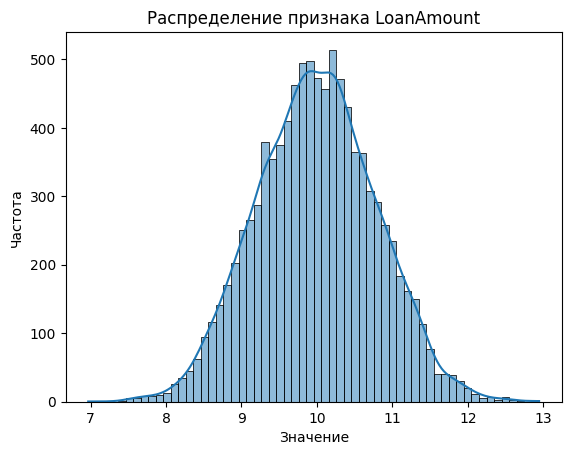

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


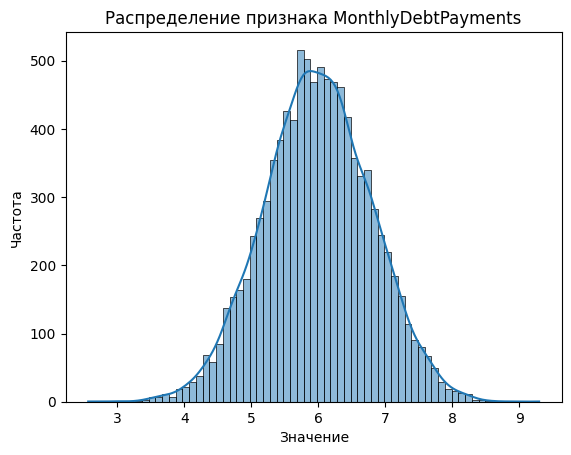

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


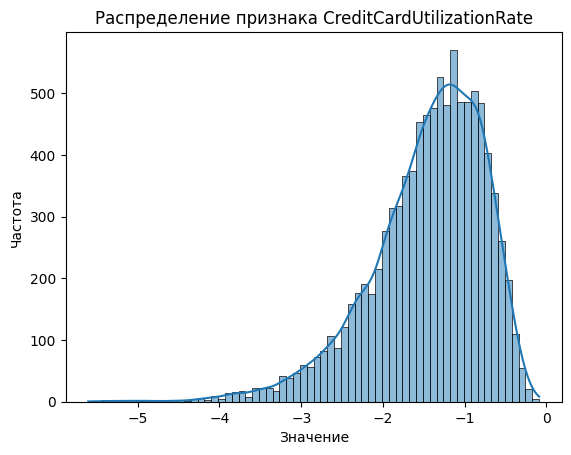

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


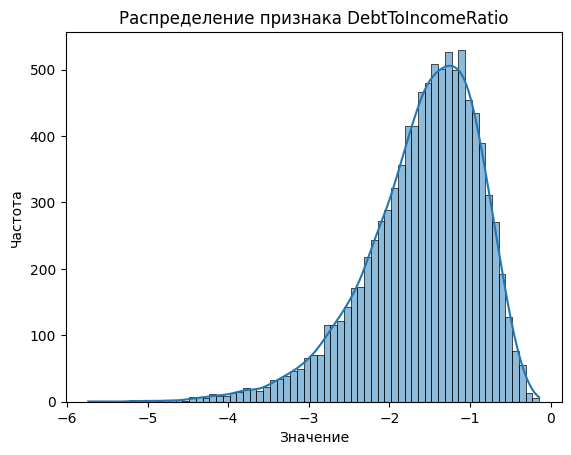

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


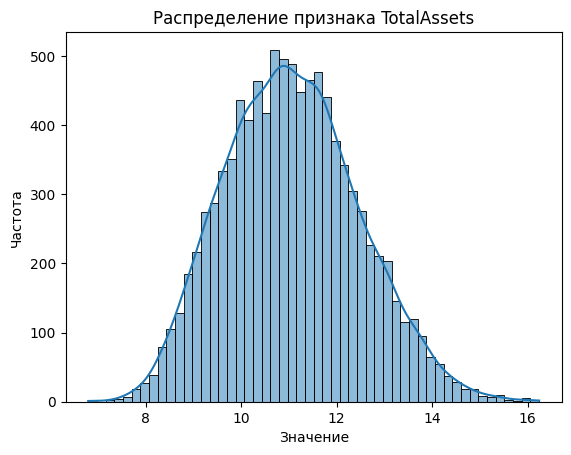

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


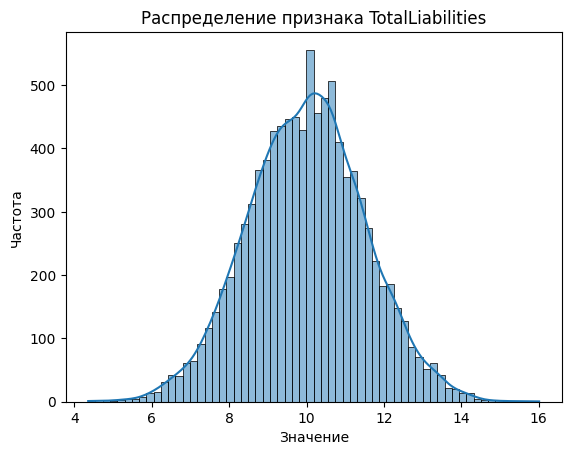

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


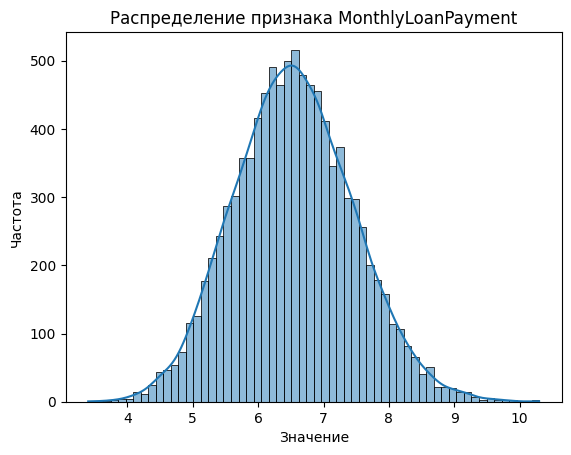

/tmp/ipykernel_150474/2859600683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.log(df[feature].replace(0, 1e-9))


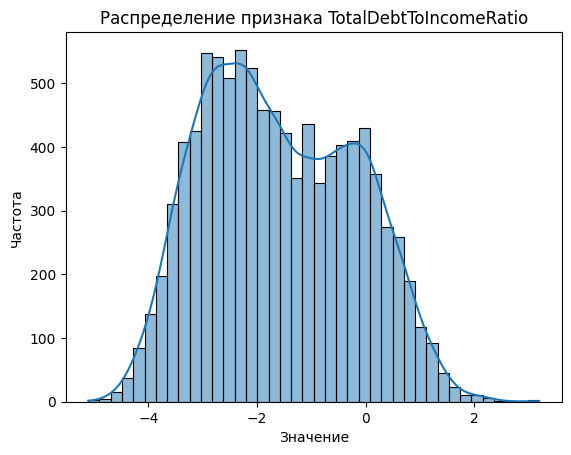

In [17]:
features_to_log = ['LoanAmount', 'MonthlyDebtPayments',
                   'CreditCardUtilizationRate', 'DebtToIncomeRatio', 
                   'TotalAssets','TotalLiabilities', 'MonthlyLoanPayment',
                   'TotalDebtToIncomeRatio']

for feature in features_to_log:
    df[feature] = np.log(df[feature].replace(0, 1e-9))
    distribution_plot(df, feature)

Используем Z-преобразование, чтобы нормализовать признаки, не забывая исключить логические признаки (1 и 0)

In [18]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.select_dtypes(include=['float64']).columns.tolist()
# columns_to_normalize.remove('LoanApproved')
columns_to_normalize.remove('BankruptcyHistory')
columns_to_normalize.remove('PreviousLoanDefaults')
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

/tmp/ipykernel_150474/49685435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,-1.111396,-0.557445,-0.735103,-0.300908,0.267948,Divorced,-0.401500,Rent,1.266570,-0.612661,...,-0.426292,Employed,Associate,-1.206022,-0.256963,0.605869,0.531148,-0.348349,0.246009,1.033126
1,1.301172,0.349975,0.981315,-0.390616,-0.712207,Widowed,-0.401500,Mortgage,-0.798365,-0.406170,...,-1.334557,Employed,High School,1.352230,-0.274446,-1.209790,-1.107447,-0.336112,-1.003534,-1.150619
2,0.956519,1.451557,0.981315,0.712910,-0.712207,Married,-1.107480,Mortgage,0.393909,0.916451,...,-0.880425,Employed,Bachelor,0.911152,0.270408,-0.973674,-0.876908,0.653897,-0.744261,-0.803339
3,-1.283722,-0.834415,0.964208,-0.168858,-0.222130,Married,-1.107480,Other,-1.201433,-0.306301,...,-0.880425,Employed,High School,-1.558884,-0.312976,-1.055636,-0.904049,-0.371155,0.069955,-0.662937
4,1.301172,1.451557,0.981315,0.416790,-0.222130,Single,0.304480,Rent,0.430128,0.223927,...,0.027841,Employed,Bachelor,1.175799,-0.323211,-0.952511,-1.150258,0.086017,-0.973821,-0.985372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,0.611867,-0.369125,-0.170567,-1.760954,-1.692361,Divorced,0.304480,Rent,-1.760062,-1.039313,...,-0.426292,Employed,Bachelor,0.470075,-0.069196,-0.465653,-0.364660,-0.372806,-0.668779,-0.393897
11011,-0.077439,1.451557,0.981315,-1.324013,0.758025,Divorced,2.422419,Own,-0.461607,-0.117647,...,-1.334557,Employed,Associate,-0.147435,-0.292639,-0.981235,-0.947792,-1.716106,-1.791307,-1.176350
11012,1.473498,1.451557,0.981315,-0.502028,-0.222130,Married,0.304480,Own,0.553295,1.018853,...,-0.426292,Employed,Associate,1.793308,0.030173,-1.118351,-0.970660,-0.672617,-1.173069,-0.922000
11013,-1.025233,-1.004003,-2.154997,1.080794,1.738179,Single,-0.401500,Own,0.698298,0.459290,...,-0.880425,Employed,Bachelor,-1.117806,-0.079641,2.600165,2.079992,1.033989,1.635036,1.119864


Используем One-Hot-Ecoding

In [19]:
categorial = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorial, drop_first=True)

bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9787 entries, 0 to 11014
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9787 non-null   float64
 1   AnnualIncome                    9787 non-null   float64
 2   CreditScore                     9787 non-null   float64
 3   LoanAmount                      9787 non-null   float64
 4   LoanDuration                    9787 non-null   float64
 5   NumberOfDependents              9787 non-null   float64
 6   MonthlyDebtPayments             9787 non-null   float64
 7   CreditCardUtilizationRate       9787 non-null   float64
 8   NumberOfOpenCreditLines         9787 non-null   float64
 9   NumberOfCreditInquiries         9787 non-null   float64
 10  DebtToIncomeRatio               9787 non-null   float64
 11  BankruptcyHistory               9787 non-null   float64
 12  PreviousLoanDefaults            9787 n

In [20]:
from sklearn.metrics import confusion_matrix

def conf_matrix(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [21]:
class CustomClassifier:
    def __init__(self, method="linear", learning_rate=0.01, epochs=1000):
        """
        Initialize the classifier.
        :param method: "linear" for linear classifier, "logistic" for logistic regression
        :param learning_rate: Learning rate for gradient descent
        :param epochs: Number of iterations for gradient descent
        """
        assert method in ["linear", "logistic"], "Invalid method: choose 'linear' or 'logistic'"
        self.method = method
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def _linear_activation(self, z):
        return z

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def _compute_loss(self, y, y_pred):
        if self.method == "linear":
            return np.mean((y - y_pred) ** 2) / 2
        elif self.method == "logistic":
            epsilon = 1e-15  # To prevent log(0)
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def _compute_gradients(self, X, y, y_pred):
        m = X.shape[0]
        if self.method == "linear":
            dz = y_pred - y
        elif self.method == "logistic":
            dz = y_pred - y

        dw = np.dot(X.T, dz) / m
        db = np.sum(dz) / m
        return dw, db

    def fit(self, X, y):
        """
        Train the classifier using gradient descent.
        :param X: Input features (numpy array of shape (n_samples, n_features))
        :param y: Target values (numpy array of shape (n_samples,))
        """
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)

        for epoch in range(self.epochs):
            # Compute the linear model
            z = np.dot(X, self.weights) + self.bias

            # Apply activation function
            if self.method == "linear":
                y_pred = self._linear_activation(z)
            elif self.method == "logistic":
                y_pred = self._sigmoid(z)

            # Compute loss
            loss = self._compute_loss(y, y_pred)

            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Make predictions on new data.
        :param X: Input features (numpy array of shape (n_samples, n_features))
        :return: Predicted values (numpy array of shape (n_samples,))
        """
        z = np.dot(X, self.weights) + self.bias

        if self.method == "linear":
            return z  # Linear output
        elif self.method == "logistic":
            return (self._sigmoid(z) >= 0.5).astype(int)  # Binary classification


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.1599
Epoch 200, Loss: 0.1262
Epoch 300, Loss: 0.1088
Epoch 400, Loss: 0.0975
Epoch 500, Loss: 0.0893
Epoch 600, Loss: 0.0830
Epoch 700, Loss: 0.0779
Epoch 800, Loss: 0.0737
Epoch 900, Loss: 0.0701
Precision: 0.9751243781094527
Recall: 0.980980980980981
F1 Score: 0.9780439121756487
Accuracy: 0.9775280898876404


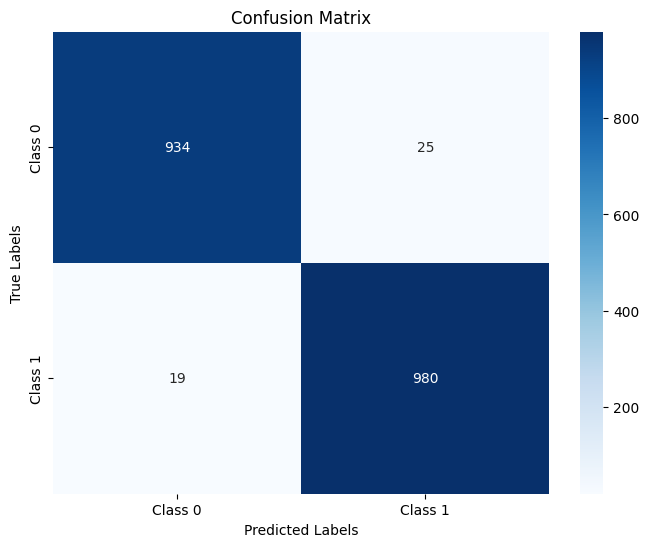

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Логистическая регрессия
classifier = CustomClassifier(method="logistic", learning_rate=0.1, epochs=1000)
classifier.fit(X_train, y_train)

# Прогнозирование
y_pred = classifier.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)


Precision: 0.991008991008991
Recall: 0.992992992992993
F1 Score: 0.992
Accuracy: 0.9918283963227783


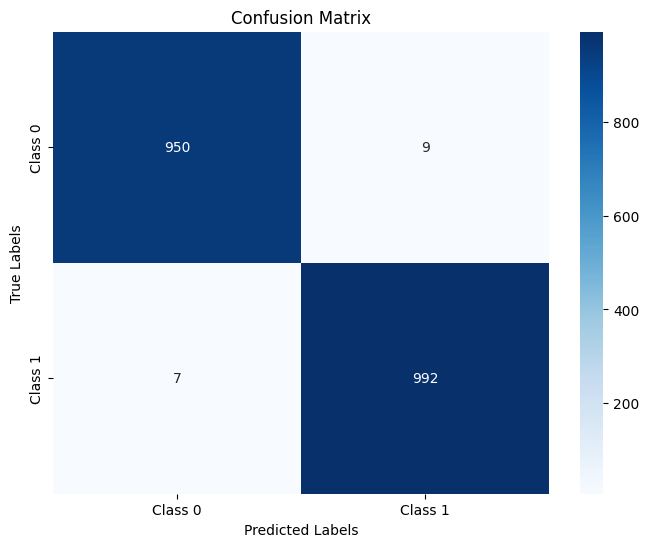

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Логистическая регрессия
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Прогнозирование
y_pred = classifier.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)

Precision: 0.9929718875502008
Recall: 0.98998998998999
F1 Score: 0.9914786967418546
Accuracy: 0.991317671092952


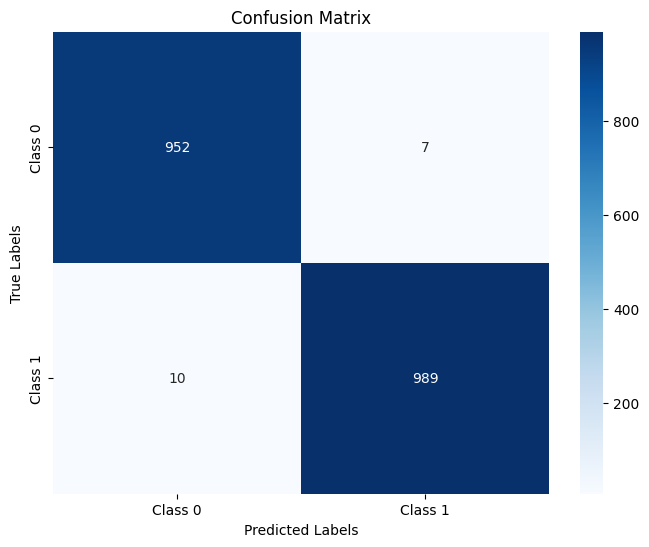

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Создание и обучение модели SVM
svm_model = SVC(kernel='linear', C=1)  # Выбор линейного ядра и параметра регуляризации C
svm_model.fit(X_train, y_train)

# Предсказание
y_pred = svm_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)

Precision: 0.9820359281437125
Recall: 0.984984984984985
F1 Score: 0.9835082458770614
Accuracy: 0.9831460674157303


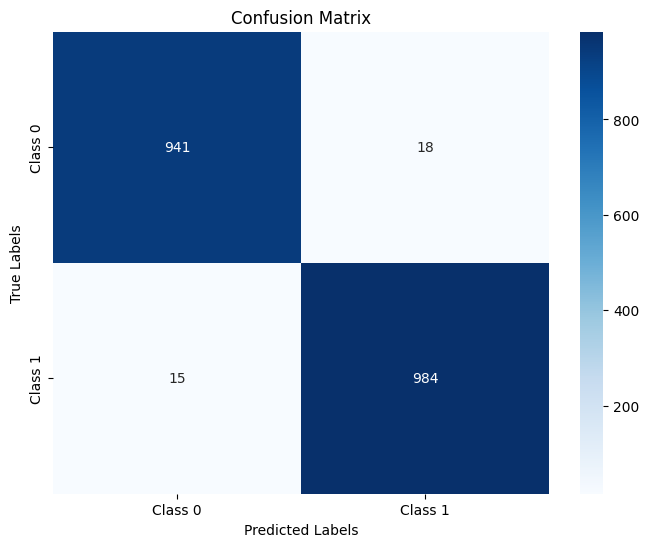

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Создание и обучение модели
tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # Установка максимальной глубины
tree.fit(X_train, y_train)

# Предсказание
y_pred = tree.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)

Precision: 0.9642857142857143
Recall: 0.972972972972973
F1 Score: 0.968609865470852
Accuracy: 0.9678243105209398


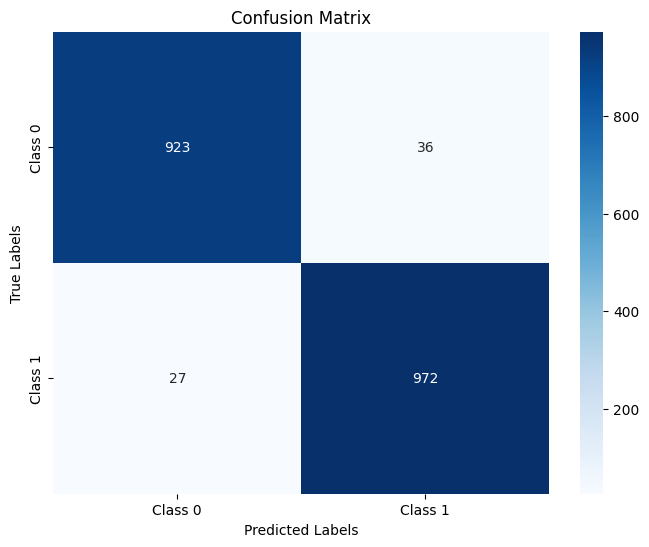

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Создание и обучение модели
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

# Предсказание
y_pred = rf_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)

Precision: 0.9890329012961117
Recall: 0.992992992992993
F1 Score: 0.991008991008991
Accuracy: 0.9908069458631257


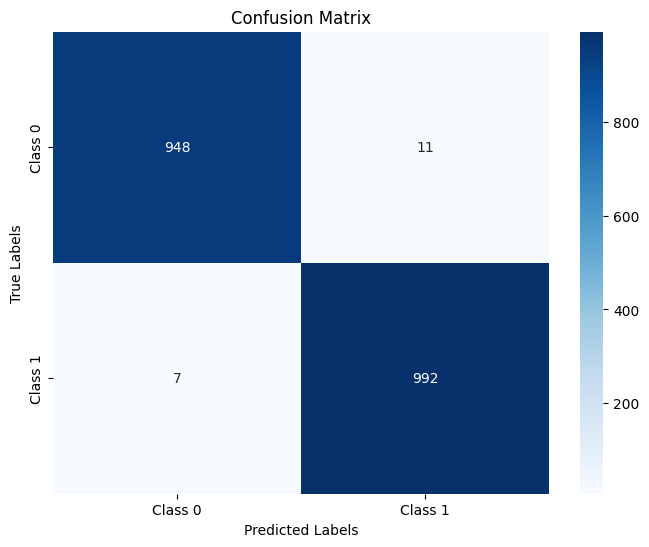

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Разделение данных на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Создание и обучение модели
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Предсказание
y_pred = gb_clf.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)


In [28]:
!pip install lightgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4013, number of negative: 3816
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4844
[LightGBM] [Info] Number of data points in the train set: 7829, number of used features: 45
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512581 -> initscore=0.050336
[LightGBM] [Info] Start training from score 0.050336
Precision: 0.996003996003996
Recall: 0.997997997997998
F1 Score: 0.997
Accuracy: 0.9969356486210419


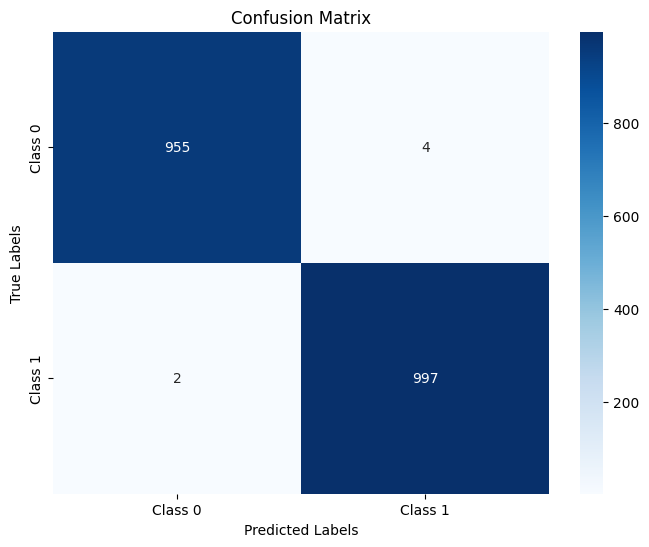

In [29]:
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

# Создание датасета для LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Параметры модели
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'seed': 42
}

# Обучение модели
gbm = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Предсказание
y_pred = (gbm.predict(X_test) > 0.5).astype(int)  # Бинаризация вероятностей

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)


In [30]:
!pip install xgboost

[0]	test-logloss:0.60560
[1]	test-logloss:0.53423
[2]	test-logloss:0.47495
[3]	test-logloss:0.42521
[4]	test-logloss:0.38294
[5]	test-logloss:0.34567
[6]	test-logloss:0.31427
[7]	test-logloss:0.28612
[8]	test-logloss:0.26114
[9]	test-logloss:0.24016
[10]	test-logloss:0.22122
[11]	test-logloss:0.20382
[12]	test-logloss:0.18878
[13]	test-logloss:0.17494
[14]	test-logloss:0.16273
[15]	test-logloss:0.15148
[16]	test-logloss:0.14207
[17]	test-logloss:0.13303
[18]	test-logloss:0.12517
[19]	test-logloss:0.11799
[20]	test-logloss:0.11075
[21]	test-logloss:0.10434
[22]	test-logloss:0.09928
[23]	test-logloss:0.09443
[24]	test-logloss:0.08981
[25]	test-logloss:0.08533
[26]	test-logloss:0.08149
[27]	test-logloss:0.07786
[28]	test-logloss:0.07470
[29]	test-logloss:0.07192
[30]	test-logloss:0.06899
[31]	test-logloss:0.06613
[32]	test-logloss:0.06373
[33]	test-logloss:0.06137
[34]	test-logloss:0.05956
[35]	test-logloss:0.05753
[36]	test-logloss:0.05545
[37]	test-logloss:0.05379
[38]	test-logloss:0.05

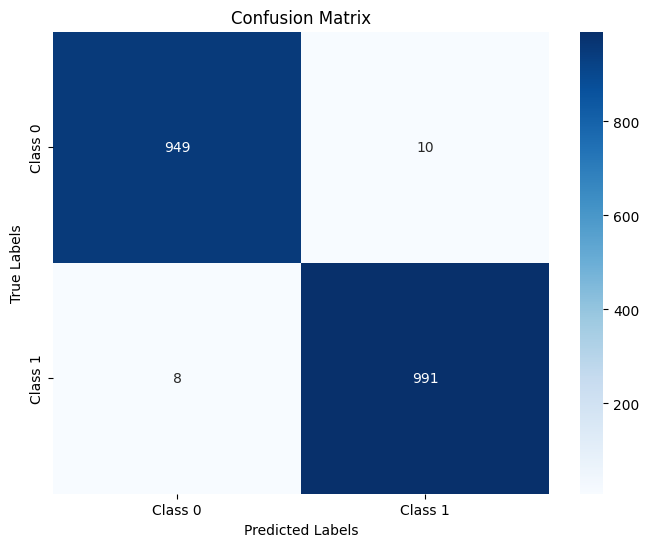

In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)


# Создание DMatrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Параметры модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'seed': 42
}

# Обучение модели
xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')])

# Предсказание
y_pred = (xgb_model.predict(dtest) > 0.5).astype(int)  # Бинаризация вероятностей

# Оценка
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)



In [32]:
!pip install catboost

Precision: 0.9900596421471173
Recall: 0.996996996996997
F1 Score: 0.9935162094763093
Accuracy: 0.9933605720122574


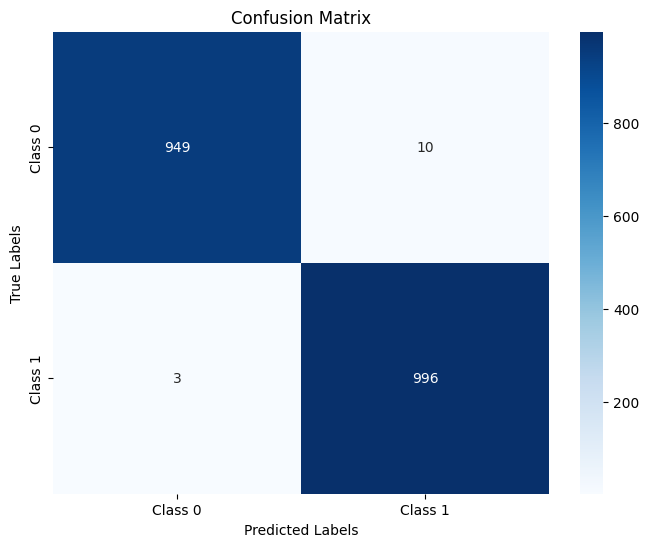

In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)


# Создание и обучение модели
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_seed=42)
cat_clf.fit(X_train, y_train)

# Предсказание
y_pred = cat_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

conf_matrix(y_test, y_pred)

## Выводы
В результате проделанной работы было обучено несколько моделей и полученый следующие результаты. Самые высокие показатели были у модели lightgbm (порядка 0,997). Почти все остальные модели показали результаты в районе 0.991. Чуть хуже себе показали модели Decision Tree и Random Forest (0.96). Увидев результаты можно отметить, что модели получаю значения достаточно близкие к друг другу, что может быть связано с тем, что данные подготовлены достаточно хорошо, и как следствие необходимость в особо сложных моделях отпадает. Просевшая метрика у моделей дерева и ансамбля может быть связана с не очень качественным подбором параметров, настройка которых достаточно тонко влияет на результат. Теперь поговорим о наиболее информативной метрике, взглянув на распределение целевой переменной, можно заметить, что распределение классов достаточно равномерное, а значит для большей информативности лучше смотреть на accuracy и f1-меру. С точки зрения бизнеса, по моему мнению, гораздо важнее правильнее будет как можно меньше выдавать кредиты тем людям, которые не смогут его вернуть, а значит нам следует стараться минимизировать метрику precision.